In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Ensembling Techniques
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier

# Probelm Definition 
Following Data Set contains the Skyserver Recoded Data for Class -  STAR's, GALAXY's & QSO's(Quasar). 

#1.We are going to find out the type of class using the rest of the attributes which are available.
#2.This would let us determine the effect of each attribute on the class of the target variable.
#3.we are going to determine the effect of Thuan-Gunn astronomic magnitude system. u, g, r, i, z on the target variable. 

In [2]:
url="https://raw.githubusercontent.com/dsrscientist/dataset1/master/Skyserver.csv"
df=pd.read_csv(url,sep=",")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
for col in ["objid","run","rerun","camcol","class"]:
    print("Coulmun Name "+col,df[col].unique())

Coulmun Name objid [1.23765e+18]
Coulmun Name run [ 752  756  308  727  745 1035 1045 1140 1231 1332 1334 1302 1239 1119
 1331 1345 1350 1404 1412 1336 1402 1411 1356]
Coulmun Name rerun [301]
Coulmun Name camcol [4 2 1 5 6 3]
Coulmun Name class ['STAR' 'GALAXY' 'QSO']


In [4]:
#Columns "objid" and "rerun" have got no unique values so they can be dropped. 
#Column "class" has three catagorical values which needs to be Encoded. 

In [5]:
df.drop(["objid","rerun"],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         10000 non-null  float64
 1   dec        10000 non-null  float64
 2   u          10000 non-null  float64
 3   g          10000 non-null  float64
 4   r          10000 non-null  float64
 5   i          10000 non-null  float64
 6   z          10000 non-null  float64
 7   run        10000 non-null  int64  
 8   camcol     10000 non-null  int64  
 9   field      10000 non-null  int64  
 10  specobjid  10000 non-null  float64
 11  class      10000 non-null  object 
 12  redshift   10000 non-null  float64
 13  plate      10000 non-null  int64  
 14  mjd        10000 non-null  int64  
 15  fiberid    10000 non-null  int64  
dtypes: float64(9), int64(6), object(1)
memory usage: 1.2+ MB


In [14]:
#There are no null Values and no Object Columns we can go ahead with EDA

# Data Analysis

In [7]:
df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [8]:
# We can observe that there are few out liers in the data 

# EDA 

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

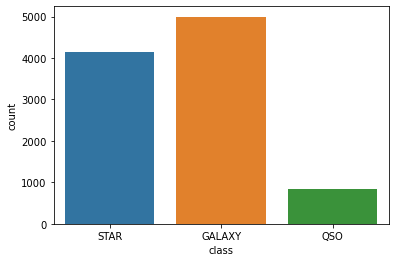

In [9]:
sns.countplot(x="class",data=df)
df["class"].value_counts()

The data has: 
#2(GALAXY) - 4998
#1(STAR) - 4152
#3(QSO) - 850

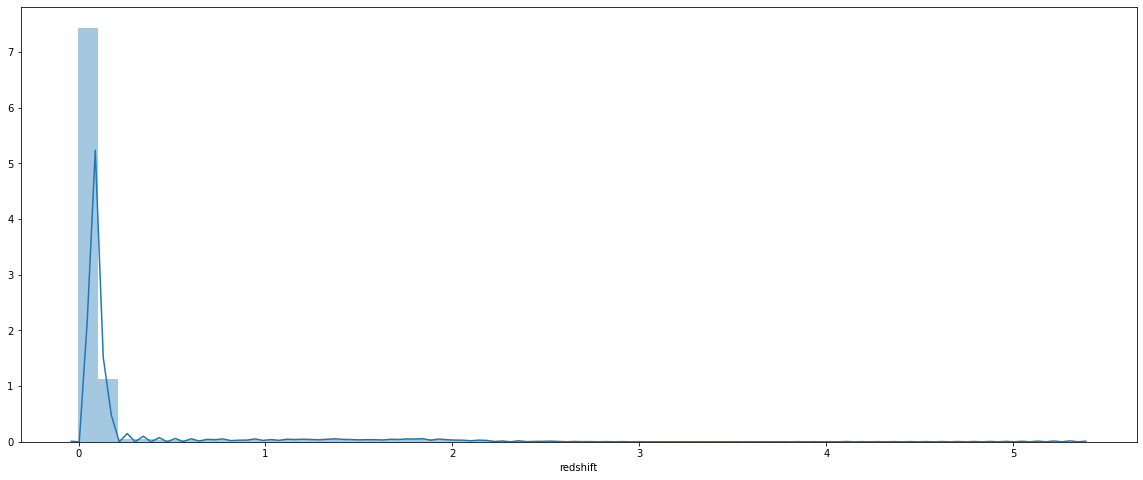

In [32]:
plt.subplots(figsize=(20,8))
sns.distplot(df.redshift)
plt.show()

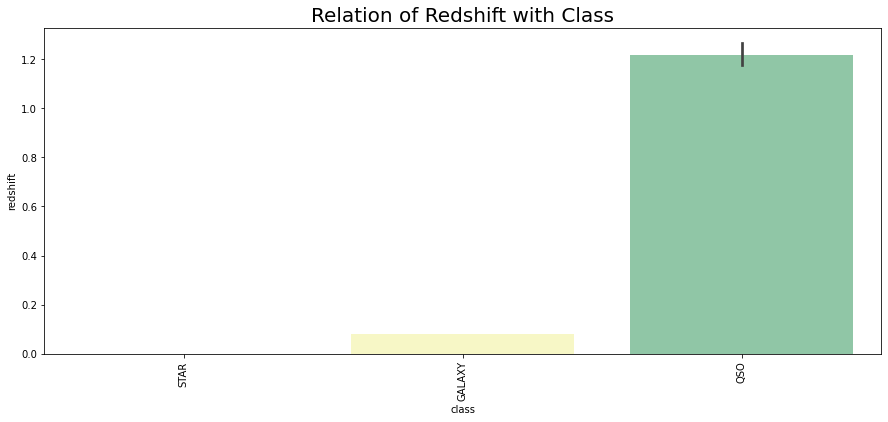

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'class', y = 'redshift', data = df, palette = 'Spectral')
plt.xticks(rotation = 90)
plt.title('Relation of Redshift with Class', fontsize = 20)
plt.show()

In [21]:
#This implies that the Redshift values directly effects the class to be QSO 

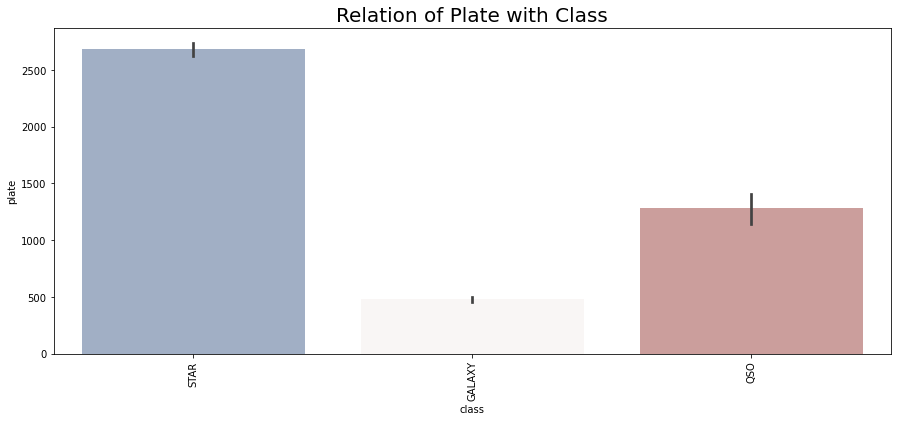

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'class', y = 'plate', data = df, palette = 'vlag')
plt.xticks(rotation = 90)
plt.title('Relation of Plate with Class', fontsize = 20)
plt.show()

<Figure size 1440x432 with 0 Axes>

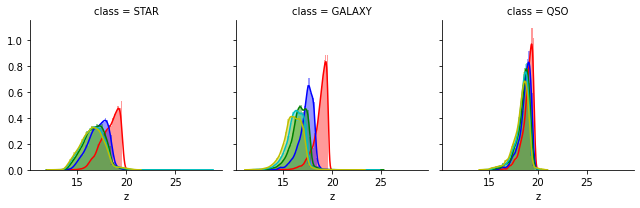

In [17]:
plt.figure(figsize=(20,6))
faset=sns.FacetGrid(df,col="class")
faset.map(sns.distplot,"u",color="r")
faset.map(sns.distplot,"g",color="b")
faset.map(sns.distplot,"r",color="g")
faset.map(sns.distplot,"i",color="c")
faset.map(sns.distplot,"z",color="y")

plt.show()

In [18]:
# we can observe pattern going with "g","r","u","z","i"

ra              AxesSubplot(0.125,0.536818;0.0824468x0.343182)
dec          AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
u            AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
g            AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
r            AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
i            AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
z            AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
run          AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
camcol             AxesSubplot(0.125,0.125;0.0824468x0.343182)
field           AxesSubplot(0.223936,0.125;0.0824468x0.343182)
specobjid       AxesSubplot(0.322872,0.125;0.0824468x0.343182)
redshift        AxesSubplot(0.421809,0.125;0.0824468x0.343182)
plate           AxesSubplot(0.520745,0.125;0.0824468x0.343182)
mjd             AxesSubplot(0.619681,0.125;0.0824468x0.343182)
fiberid         AxesSubplot(0.718617,0.125;0.0824468x0.343182)
dtype: object

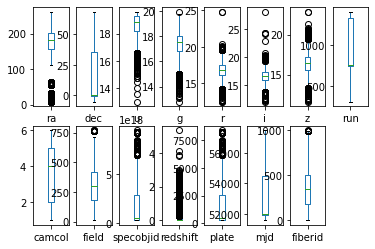

In [28]:
df.plot(kind="box",subplots=True,layout=(2,8))

Coulmun redshift  9637


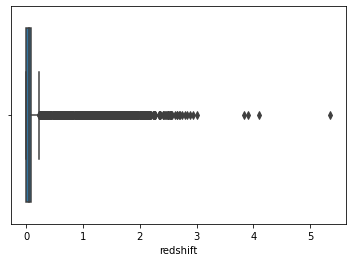

In [29]:
sns.boxplot(x=df.redshift)
print("Coulmun redshift ", df["redshift"].nunique())

In [30]:
#There are outliers in few columns let's check if we can handle them 

In [33]:
df["class"].replace({'STAR':1 ,'GALAXY':2 ,'QSO':3}, inplace=True)

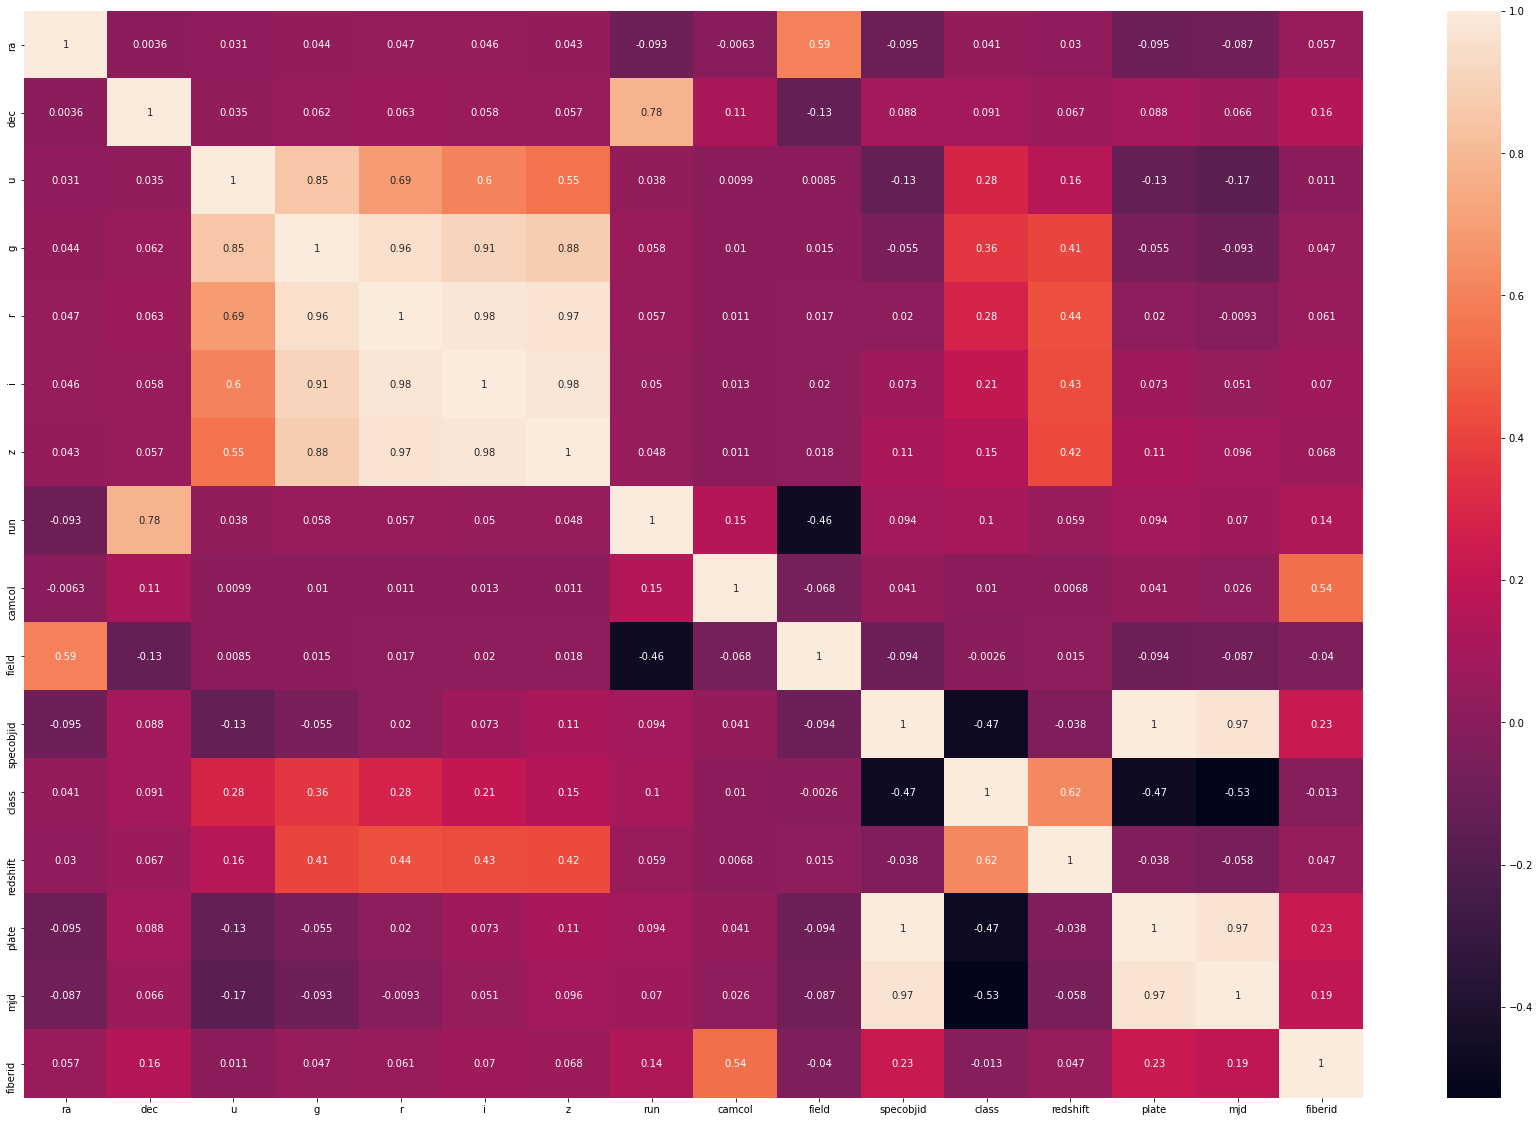

In [40]:
corr_hmap= df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()

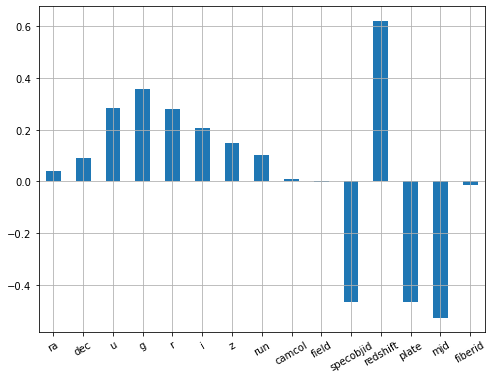

In [42]:
plt.figure(figsize=(8,6))
df.drop("class",axis=1).corrwith(df["class"]).plot(kind="bar",grid=True)
plt.xticks(rotation=30)
plt.show()

# EDA Concluding Remarks

#Column "redshift" has 62% correaltion with class,
#Columns "u"-28%,"g"-36%,"r"- 28% and "i"-21% Coorelation with Class and 
#Clounms "specobjid","plate","mjd" have Negative Coorelation with Class
#This implies that the Redshift values directly effects the class to be QSO 

#Columns "camcol","field" and "fiberid" have little to no relation with the Target variable 

# Pre-processing Pipeline

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
print("\n Original Shape", df.shape, "New Shape",df_new.shape)

(array([  45,  109,  129, ..., 9994, 9997, 9997], dtype=int64), array([12, 12, 12, ..., 13, 10, 13], dtype=int64))

 Original Shape (10000, 16) New Shape (8698, 16)


In [47]:
Percntage_loss=((10000-8698)/10000)*100
print("\nPercentage loss:",Percntage_loss)


Percentage loss: 13.020000000000001


In [48]:
#There is 13.02% loss of data when using z Score let's check with IQR

In [49]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

ra           4.417633e+01
dec          3.618843e+01
u            1.081197e+00
g            1.195045e+00
r            1.339343e+00
i            1.404845e+00
z            1.523162e+00
run          5.790000e+02
camcol       3.000000e+00
field        2.300000e+02
specobjid    2.542375e+18
class        1.000000e+00
redshift     9.249761e-02
plate        2.258000e+03
mjd          2.568000e+03
fiberid      3.232500e+02
dtype: float64


In [50]:
df.new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.new1.shape

(7978, 16)

In [51]:
Percntage_loss=((10000-7978)/10000)*100
print(Percntage_loss)

20.22


The Percentage loss is more then 20% so we are going to try building the model with outliers present and then build it with zscore outlier removed technique

In [44]:
y=df["class"]
x=df.drop("class", axis=1)
print("\n X Shape", x.shape, "Y Shape",y.shape)


 X Shape (10000, 15) Y Shape (10000,)


In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [52]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
    #if accuracy_score(y_train,pred_train)*100>max_scr:  
        max_scr=accuracy_score(y_train,pred_train)*100
        print("At random state",i,"The model Perfomes very well")
        print("Training accuracy_score is:",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:",accuracy_score(y_test,pred_test), end = "\n\n\n")

At random state 47 The model Perfomes very well
Training accuracy_score is: 97.8
Testing accuracy_score is: 0.978




In [53]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=47)
num_folds = 10
seed = 47
scoring = 'accuracy'

# Building Machine Learning Models

In [54]:
models= [
    ("SVC",SVC()),
    ("Logistic Regression",LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes",GaussianNB()),
    ("KNearest Neighbors",KNeighborsClassifier(3)),
    ("RandomForestClassifier",RandomForestClassifier())
    ]

In [55]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVC: 0.955750 (0.008258)
Logistic Regression: 0.976125 (0.006788)
Decision Tree: 0.986000 (0.004500)
Naive Bayes: 0.942625 (0.010918)
KNearest Neighbors: 0.899875 (0.010147)
RandomForestClassifier: 0.989125 (0.005592)


Data has perfomed well with RandomForest and DecisionTree Classifiers 

# HyperParameter Tyning

In [56]:
#RandomForest Hyper Parameter Tuning

n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.989375 using {'max_features': 'log2', 'n_estimators': 100}
#3 0.988000 (0.005596) with: {'max_features': 'sqrt', 'n_estimators': 10}
#2 0.989000 (0.005668) with: {'max_features': 'sqrt', 'n_estimators': 100}
#4 0.987625 (0.005198) with: {'max_features': 'log2', 'n_estimators': 10}
#1 0.989375 (0.005484) with: {'max_features': 'log2', 'n_estimators': 100}


In [57]:
#DecisionTree Hyper Parameter Tuning

criterion=["gini", "entropy"]
splitter=["best", "random"]
max_depth = [2,4,6,8,10,12,None]
param_grid = dict(splitter=splitter,criterion=criterion,max_depth =max_depth )
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.989500 using {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
#5 0.988250 (0.005397) with: {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
#27 0.822750 (0.025732) with: {'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}
#6 0.988125 (0.005281) with: {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
#26 0.868250 (0.020813) with: {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
#6 0.988125 (0.004267) with: {'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}
#23 0.931875 (0.035678) with: {'criterion': 'gini', 'max_depth': 6, 'splitter': 'random'}
#10 0.988000 (0.003717) with: {'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}
#22 0.939750 (0.027759) with: {'criterion': 'gini', 'max_depth': 8, 'splitter': 'random'}
#6 0.988125 (0.003634) with: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
#17 0.979625 (0.012687) with: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
#13 0.986250 (0.004610) with: 

Model Has perfomed best with Following Parameters DecisionTreeClassifier('criterion': 'entropy', 'max_depth': 4, 'splitter': 'best') and 98.98% score

# Ensembling Techniques 

In [78]:
models= [AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
names = []

for m in models:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print(accuracy_score(y_test, predm)) 
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print("****************************************************************")
    print("\n")

[AdaBoostClassifier()]:
0.8765
[[798  15   0]
 [  6 930  53]
 [  1 172  25]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.99       813
           2       0.83      0.94      0.88       989
           3       0.32      0.13      0.18       198

    accuracy                           0.88      2000
   macro avg       0.71      0.68      0.68      2000
weighted avg       0.85      0.88      0.86      2000

****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier()]:
0.986
[[813   0   0]
 [  1 974  14]
 [  1  12 185]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       813
           2       0.99      0.98      0.99       989
           3       0.93      0.93      0.93       198

    accuracy                           0.99      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.99      0.99      0.99

In [79]:
#Over All Perfomance has not been incerased with Ensembling Techniques 

In [61]:
model= DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, splitter= 'best')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)*100 )
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

98.75
[[812   1   0]
 [  1 976  12]
 [  1  10 187]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       813
           2       0.99      0.99      0.99       989
           3       0.94      0.94      0.94       198

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



In [58]:
#The Score has been consistant with the predicting data well so we can go ahead with finializing the Model 
#with a Accuracy score of 98.75% 

In [59]:
import joblib
joblib.dump(model,"Spacedata.pkl")

['Spacedata.pkl']

In [62]:
df_pred=pd.DataFrame({"Original":y_test,"Predicted":predictions})
df_pred

,Original,Predicted
7432,2,2
5444,2,2
5448,1,1
8654,1,1
7543,2,3
...,...,...
6746,2,2
2903,2,2
3893,1,1
7995,1,1


# Concluding Remarks